In [1]:
import numpy as np
import json
import random
import matplotlib.pyplot as plt

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
with open('../../data/lemmatized-tokenized.json') as f:  
    data = json.load(f)
doc_ids = np.array(list(data.keys()))

In [3]:
def doc2vec(data, doc_ids, embedding_size=50, window_size=2, min_count=1, workers=4):
    docs = list(data.values())
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]
    model = Doc2Vec(documents, 
                    vector_size=embedding_size, 
                    window=window_size, 
                    min_count=min_count, 
                    workers=workers)
    return np.array([model.infer_vector(data[key]) for key in doc_ids])

def bags_of_words(data, doc_ids):
    docs = [' '.join(data[key]) for key in doc_ids]
    model = CountVectorizer().fit_transform(docs)
    counts = model.toarray()
    return counts / np.linalg.norm(counts)

def tfidf(data, doc_ids):
    docs = [' '.join(data[key]) for key in doc_ids]
    model = TfidfVectorizer().fit_transform(docs)
    counts = model.toarray()
    return counts / np.linalg.norm(counts)

In [4]:
def cluster(vectors, doc_ids, id2doc, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)

    doc_ids_clusters, doc_clusters, variances = [], [], []
    for i in range(n_clusters):
        doc_ids_clusters.append(doc_ids[kmeans.labels_ == i])
        doc_clusters.append([id2doc[key] for key in doc_ids[kmeans.labels_ == i]])
        variances.append(variance(vectors[kmeans.labels_ == i]))
    
    print('cluster variance:', variances)
    print('cluster size:', [len(c) for c in doc_clusters])
    
    return doc_ids_clusters, doc_clusters

def variance(vectors):
    return np.mean(np.var(vectors, axis=0))

# https://www.datacamp.com/community/tutorials/wordcloud-python
def make_wordcloud(docs):
    wordcloud = WordCloud().generate(' '.join([token for d in docs for token in d]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

cluster variance: [0.018847993, 0.01880359, 0.0054838145, 0.03216416, 0.042918853, 0.04275565, 0.04141468, 0.026886197, 0.010626971, 0.024730435]
cluster size: [814, 956, 3597, 342, 336, 253, 387, 697, 1930, 688]
Pages in cluster: ['LeBron_James', 'Dwayne_Johnson', 'Tonya_Harding', 'Khabib_Nurmagomedov', 'John_Cena', 'Stephen_Curry', 'Anthony_Joshua', 'Caitlyn_Jenner', 'Naomi_Osaka', 'The_Undertaker']


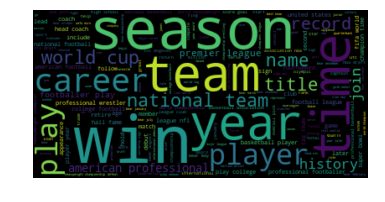

Pages in cluster: ['Anthony_Bourdain', 'Meghan,_Duchess_of_Sussex', 'Charles,_Prince_of_Wales', 'Prince_Philip,_Duke_of_Edinburgh', 'Pablo_Escobar', 'Jeff_Bezos', 'Diana,_Princess_of_Wales', 'Prince_William,_Duke_of_Cambridge', 'Jeffrey_Dahmer', 'Prince_Harry,_Duke_of_Sussex']


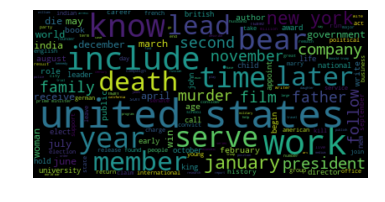

Pages in cluster: ['Louis_Tomlinson', 'Antonio_Maria_Magro', 'Dua_Lipa', 'Pete_Davidson', 'Andrew_Cunanan', 'Hailey_Baldwin', 'Dolores_O%27Riordan', 'John_Paul_Getty_III', 'Lisa_Bonet', 'Beto_O%27Rourke']


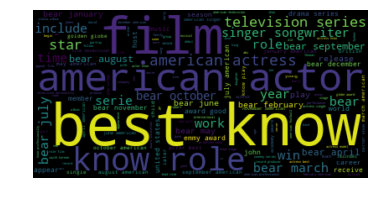

Pages in cluster: ['Elon_Musk', 'Stephen_Hawking', 'P._T._Barnum', 'Albert_Einstein', 'Ted_Kaczynski', 'Steve_Jobs', 'William_Shakespeare', 'Bill_Gates', 'Rajneesh', 'Nikola_Tesla']


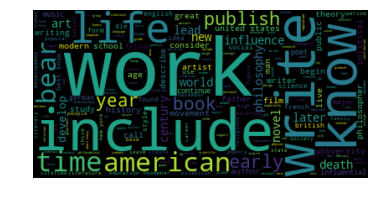

Pages in cluster: ['Donald_Trump', 'George_H._W._Bush', 'John_McCain', 'Winston_Churchill', 'Barack_Obama', 'Adolf_Hitler', 'Brett_Kavanaugh', 'Mahatma_Gandhi', 'George_W._Bush', 'Martin_Luther_King_Jr.']


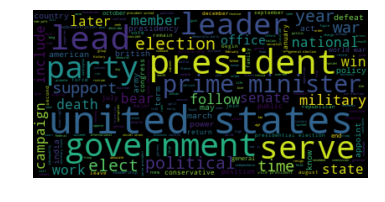

Pages in cluster: ['Elizabeth_II', 'Queen_Victoria', 'Princess_Margaret,_Countess_of_Snowdon', 'George_VI', 'Mary,_Queen_of_Scots', 'Edward_VIII', 'George_V', 'Elizabeth_I_of_England', 'Joaqu%C3%ADn_%22El_Chapo%22_Guzm%C3%A1n', 'Henry_VIII_of_England']


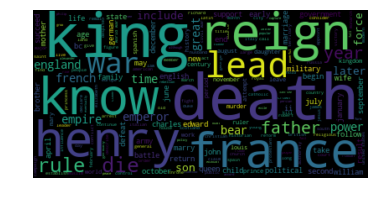

Pages in cluster: ['Cristiano_Ronaldo', 'Lionel_Messi', 'Michael_Jordan', 'Tom_Brady', 'Kylian_Mbapp%C3%A9', 'Mohamed_Salah', 'Conor_McGregor', 'Roger_Federer', 'Virat_Kohli', 'Neymar']


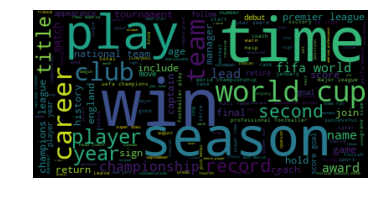

Pages in cluster: ['Cardi_B', 'Freddie_Mercury', 'XXXTentacion', 'Ariana_Grande', '6ix9ine', 'Avicii', 'Donald_Glover', 'Nick_Jonas', 'Post_Malone', 'Michael_Jackson']


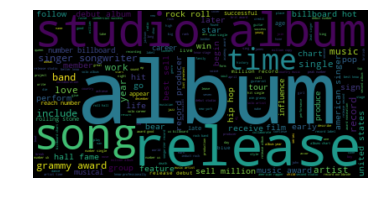

Pages in cluster: ['Jason_Momoa', 'Stan_Lee', 'Sylvester_Stallone', 'Jennifer_Aniston', 'Michael_B._Jordan', 'Burt_Reynolds', 'Ryan_Reynolds', 'Chris_Hemsworth', 'Josh_Brolin', 'Gianni_Versace']


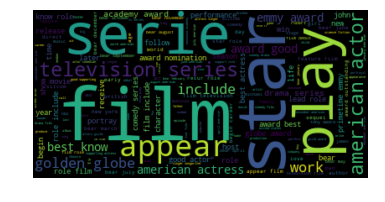

Pages in cluster: ['Priyanka_Chopra', 'Sridevi', 'Tom_Cruise', 'Demi_Lovato', 'Clint_Eastwood', 'Scarlett_Johansson', 'Emily_Blunt', 'Keanu_Reeves', 'Bradley_Cooper', 'John_Krasinski']


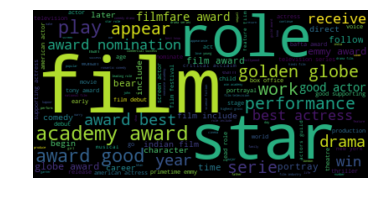

In [5]:
n_clusters = 10

# doc2vec
d2v_vecs = doc2vec(data, doc_ids)
d2v_id_clusters, d2v_doc_clusters = cluster(d2v_vecs, doc_ids, data, n_clusters=n_clusters)
for i in range(n_clusters):
    print('Pages in cluster:', [x[6:] for x in d2v_id_clusters[i][:10]])
    make_wordcloud(d2v_doc_clusters[i])

In [6]:
# bags of words
# bow_vecs = bags_of_words(data, doc_ids)
# bow_id_clusters, bow_doc_clusters = cluster(bow_vecs, doc_ids, data, n_clusters=n_clusters)
# for i in range(n_clusters):
#     print('Pages in cluster:', [x[6:] for x in bow_id_clusters[i][:10]])
#     make_wordcloud(bow_doc_clusters[i])

In [7]:
# TF-IDF
# tfidf_vecs = tfidf(data, doc_ids)
# tfidf_id_clusters, tfidf_doc_clusters = cluster(tfidf_vecs, doc_ids, data, n_clusters=n_clusters)
# for i in range(n_clusters):
#     print('Pages in cluster:', [x[6:] for x in tfidf_id_clusters[i][:10]])
#     make_wordcloud(tfidf_doc_clusters[i])